In [22]:
import numpy as np

In [23]:
from PIL import Image
image = Image.open('/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/erythroblast/ERB_233.jpg')

In [24]:
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
image.show()

JPEG
(360, 363)
RGB


uint8
(363, 360, 3)


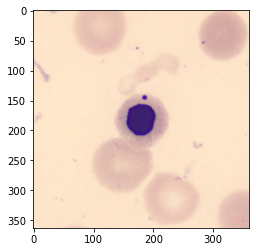

In [25]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/erythroblast/ERB_233.jpg')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [26]:
# load the image
image = Image.open('/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/erythroblast/ERB_233.jpg')
# convert image to numpy array
data =np.asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(363, 360, 3)
<class 'PIL.Image.Image'>
RGB
(360, 363)


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, color, exposure
import skimage

from pathlib import Path
path_name = '/Users/yahiabouzoubaa/Downloads/CSVFILE.csv'
path = Path(path_name)
df = pd.read_csv(path_name)
df.head()

,path,id,label,height,width,mean_brightness
0,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,689200,BA,363,360,196.926051
1,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,883452,BA,363,360,195.410810
2,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,382161,BA,369,366,203.066973
3,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,175579,BA,363,360,198.335374
4,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,775722,BA,363,360,207.585088


In [89]:
sample = df.groupby('label').apply(lambda x: x.sample(n=500)).reset_index(drop = True)
new_df.label.value_counts()


IG          100
LY          100
MO          100
BA          100
BNE         100
PLATELET    100
EO          100
ERB         100
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

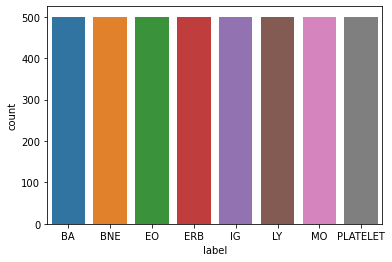

In [90]:
sns.countplot(x=sample.label)

In [96]:
np_data = []
np.random
for i in sample['path']:
    img = np.asarray(Image.open(i).resize((363,360)).convert('L')).reshape(-1)
    np_data.append(img)

In [97]:
np.array(np_data).shape

(4000, 130680)

In [98]:
np_data[0]

array([184, 187, 191, ..., 227, 221, 216], dtype=uint8)

In [99]:
np_feats = np.transpose(np_data)

In [100]:
df_data = pd.DataFrame(np_feats)

In [101]:
df_data = df_data.transpose()

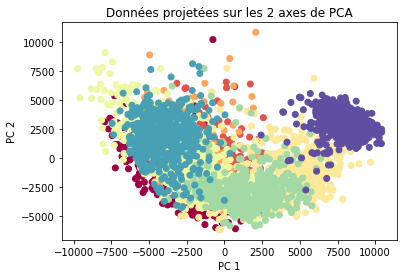

<Figure size 432x288 with 0 Axes>

In [103]:
target = sample.label.replace({'BA':0, 'BNE':1, 'EO':2, 'ERB':3, 'IG':4, 'LY':5, 'MO':6, 'PLATELET':7})
pca = PCA(n_components = 0.9)
X_pca = pca.fit_transform(df_data)
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap=plt.cm.Spectral)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

fig = plt.figure()





In [94]:
sample.label.unique()

array(['BA', 'BNE', 'EO', 'ERB', 'IG', 'LY', 'MO', 'PLATELET'],
      dtype=object)